# Logistic Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(100, 3)
(60, 3) (40, 3)


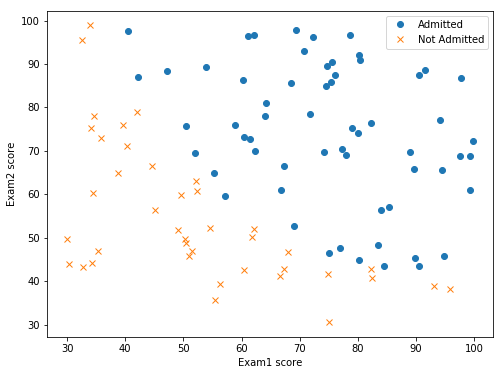

In [4]:
data = np.loadtxt('./machine-learning-ex2/ex2/ex2data1.txt', delimiter=',')

pos = np.array([x for x in data if x[2] == 1])
neg = np.array([x for x in data if x[2] == 0])
m = len(data)
print(data.shape)
print(pos.shape, neg.shape)

def showTrainingData():
    plt.figure(figsize=(8, 6))
    plt.plot(pos[:,:1], pos[:,1:2], 'o', label='Admitted')
    plt.plot(neg[:,:1], neg[:,1:2], 'x', label='Not Admitted')
    plt.xlabel('Exam1 score')
    plt.ylabel('Exam2 score')
    plt.legend()
showTrainingData()

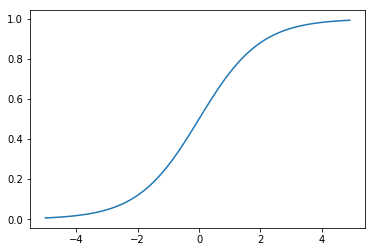

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xs = np.arange(-5.0, 5.0, 0.1)
ys = np.array(sigmoid(xs))
plt.plot(xs, ys)

In [6]:
def hypothesis(x, theta, b):
    return sigmoid(np.matmul(x, theta) + b)  # (100, 2) * (2 * 1) + (100, 1) = (100, 1)

def LogisticRegressionCostFunc(theta, b, x, y):
    hx = hypothesis(x, theta, b)  # (100, 1)
    return np.dot(-1/m, np.sum(np.matmul(y.T, np.log(hx)) + np.matmul((1 - y).T, np.log(1 - hx))))

def GradientDescent(theta, b, learning_rate, x, y):
    theta_gradient = learning_rate / m * np.matmul(x.T, ((hypothesis(x, theta, b) - y))) # (2, 100) * (100, 1) = (2, 1)
    b_gradient = learning_rate / m * np.sum(hypothesis(x, theta, b) - y)  # (100, 1)
    
    theta = np.subtract(theta, theta_gradient)
    b = np.subtract(b, b_gradient)
    return theta, b

def showCostFunction(x, y):
    plt.figure(figsize=(12, 8))
    plt.plot(x, y)
    plt.xlabel('steps')
    plt.ylabel('cost')
    
def showLogisticRegression(x, y, theta, b):
    plt.figure(figsize=(12, 8))
    showTrainingData()
    xrange = np.arange(np.min(x[:, 0]), np.max(x[:, 0]), 0.1)
    decision_boundary = -(theta[0][0] * xrange + b) / theta[1][0]
    plt.plot(xrange, decision_boundary)
    

0.6931471805599453
0.22465419088247437


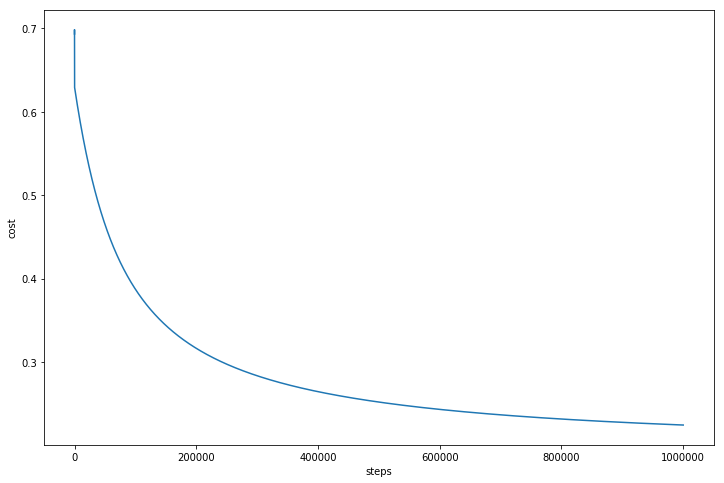

<Figure size 864x576 with 0 Axes>

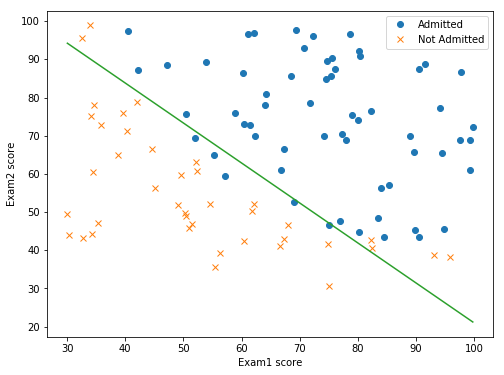

In [7]:
def main1():
    x = np.array(data[:, :-1])
    y = np.array(data[:, -1]).reshape((-1, 1))
    theta = np.zeros((2, 1))
    b = np.zeros((100, 1))
    
    learning_rate = 1e-3
    steps = 1000000
    
    plt_step = np.empty(steps)
    plt_cost = np.empty(steps)
    
    for step in range(steps):
        plt_cost[step] = LogisticRegressionCostFunc(theta, b, x, y)
        plt_step[step] = step
        theta, b = GradientDescent(theta, b, learning_rate, x, y)
    print(plt_cost[0])
    print(plt_cost[steps - 1])
    showCostFunction(plt_step, plt_cost)
    showLogisticRegression(x, y, theta, b[0][0])
main1()

# Regularized logistic regression

(118, 3)


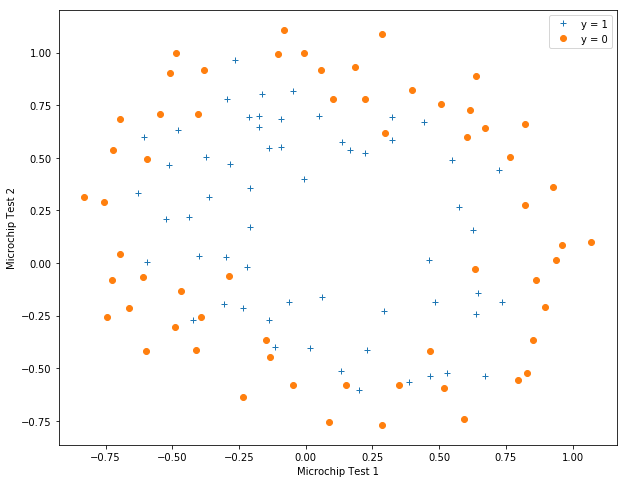

In [8]:
data2 = np.loadtxt('./machine-learning-ex2/ex2/ex2data2.txt', delimiter=',')

accepted = np.array([x for x in data2 if x[2] == 1])
rejected = np.array([x for x in data2 if x[2] == 0])

def showData2Plot():
    plt.figure(figsize=(10, 8))
    plt.plot(accepted[:, 0], accepted[:, 1], '+', label='y = 1')
    plt.plot(rejected[:, 0], rejected[:, 1], 'o', label='y = 0')
    plt.xlabel("Microchip Test 1")
    plt.ylabel("Microchip Test 2")
    plt.legend()
    
showData2Plot()

print(data2.shape)

0.6931471805599454
0.3128010673198278
(27, 1)


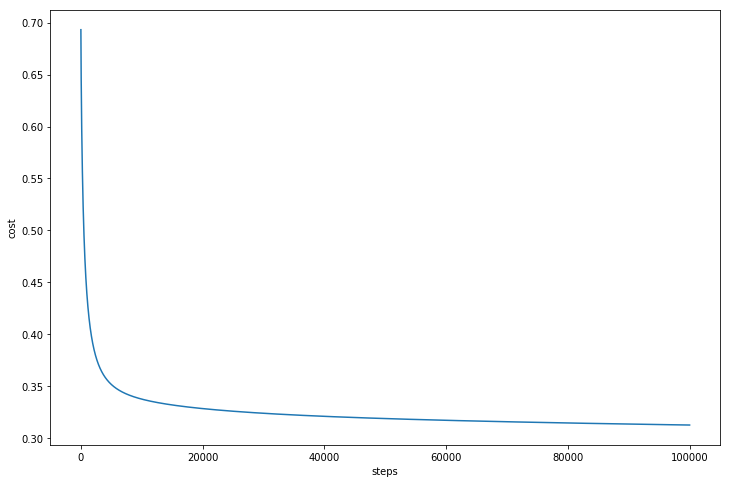

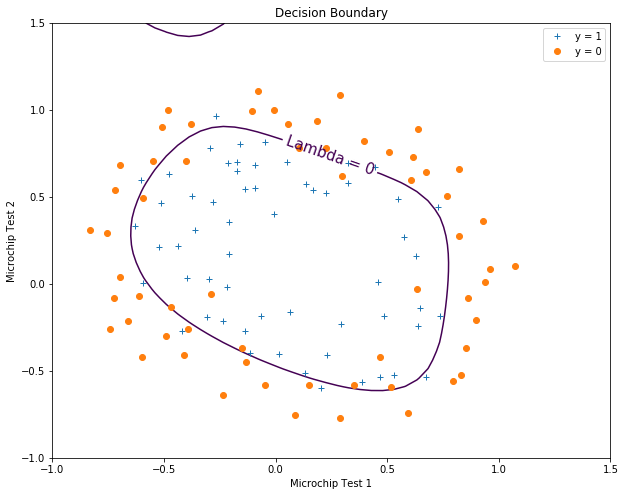

In [56]:
def RegularizedCostFunction(theta, b, x, y, m, _lambda):
    hx = hypothesis(x, theta, b) # (100, 1)
    cost = -1/m * np.sum(np.matmul(y.T, np.log(hx)) + np.matmul((1 - y).T, np.log(1 - hx)))
    regularizationTerm = _lambda/(2*m) * np.sum(np.square((theta)))
    cost = cost + regularizationTerm
    return cost

def GradientDescentRegularization(theta, b, x, y, learning_rate, _lambda):
    # (27, 118) * (118, 1) + (27, 1)
    theta_gradient = learning_rate / m * np.matmul(x.T, hypothesis(x, theta, b) - y) + _lambda / m * theta
    b_gradient = learning_rate / m * np.sum(hypothesis(x, theta, b) - y)
    
    theta = theta - theta_gradient
    b = b - b_gradient
    return theta, b

def changeFeatures(x1, x2):
    dim = 6
    features = []
    for i in range(1, dim + 1):
        for j in range(0, i + 1):
            tmp = x1 ** (i - j) * x2 ** (j)
            features.append(tmp)
    
    return np.array(features).T

def showRegularizedLogisticPlot(x):
    plt.figure(figsize=(10, 8))
    showData2Plot()
    plt.plot()

def showDecisionBoundaryPlot(theta, b, _lambda):
    showData2Plot()
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    print(theta.shape)
    for i in range(len(u)):
        for j in range(len(v)):
            tmp = changeFeatures(np.array([u[i]]), np.array([v[j]]))
            z[i][j] = np.matmul(tmp, theta) + b[0][0]
    z = z.T
    u_x, v_x = np.meshgrid( u, v )
    mycontour = plt.contour( u, v, z, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = ' + str(_lambda)}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")
    
def main2():
    x = np.array(data2[:, :-1]) # (118, 2)
    y = np.array(data2[:, -1]).reshape((-1, 1)) # (118, 1)
    
    x = changeFeatures(x[:, 0], x[:, 1]) # (118, 27)
    m = len(x)
    n = len(x[0])
    
    theta = np.zeros((n, 1))
    b = np.zeros((m, 1))
    
    learning_rate = 1e-1
    steps = 100000
    _lambda = 0
    
    plt_step = np.empty(steps)
    plt_cost = np.empty(steps)
    
    for step in range(steps):
        plt_step[step] = step
        plt_cost[step] = RegularizedCostFunction(theta, b, x, y, m, _lambda)
        theta, b = GradientDescentRegularization(theta, b, x, y, learning_rate, _lambda)
    print(plt_cost[0])
    print(plt_cost[steps - 1])
    
    showCostFunction(plt_step, plt_cost)
    showDecisionBoundaryPlot(theta, b, _lambda)
    
main2()    